# Introduction & Motivation

In the rapidly evolving landscape of information dissemination, the proliferation of fake news poses a significant challenge to society. As traditional information sources are complemented by online platforms and social media, the ability to distinguish between accurate information and fabricated content becomes increasingly complex. The field of Natural Language Processing (NLP) has emerged as a crucial tool in addressing this issue by leveraging advanced techniques to develop algorithms capable of identifying and combatting fake news.

\\

The motivation behind our project stems from the critical need to ensure the integrity of information consumed by individuals in the digital age. Fake news not only misinforms the public but also has the potential to sway public opinion, influence elections, and undermine trust in credible sources. As purveyors of information, we are driven by the responsibility to create technologies that empower users to make well-informed decisions and mitigate the spread of misinformation.

\\

In this project, our focus lies on the task of fake news detection, a pivotal aspect of combating misinformation. The core challenge we have chosen to address revolves around improving the accuracy of fake news detection models. We recognize that in the realm of fake news detection, achieving a fair and accurate classification of news articles is of paramount importance. To tackle this, we have selected the BERT (Bidirectional Encoder Representations from Transformers) model, a state-of-the-art large language model known for its exceptional performance in various NLP tasks.

\\

Our decision to employ fine-tuning on the BERT model aligns with our goal of enhancing accuracy. By adapting BERT to the nuances of fake news detection, we intend to harness its ability to capture contextual information and linguistic nuances, enabling the model to discern subtle differences between genuine and fake news articles. The inherent power of BERT, combined with fine-tuning, holds the promise of elevating the precision of our fake news detection system and contributing to a more informed and vigilant digital society.

\\

In the subsequent sections of this report, we will delve into the technical intricacies of our approach, detailing the process of fine-tuning the BERT model for fake news detection. We will also discuss the dataset used, methodology applied, experimental results, and implications of our work. Through this project, we aspire to not only improve the accuracy of fake news detection but also shed light on the potential of NLP and machine learning in addressing critical societal challenges.

# Approach

## Our Model Structure

In [3]:
+-----------------------------+
|  Dataset                    |
+-----------------------------+
              |
              v
+-----------------------------+
|   Tokenization with         |
|AutoTokenizer from base model|
+-----------------------------+
              |
              v
+---------------------------------------------------------+
|                 DistilBertForSequenceClassification    |
|                  (Fine-tuned Model)                    |
|                                                         |
|                +-----------------+                      |
|                |    DistilBERT   |                      |
|                |   (Pre-trained) |                      |
|                +-----------------+                      |
|                    |              |                     |
|                    v              |                     |
|     +--------------------------+  |                     |
|     |     Pre-classifier       |  |                     |
|     |   Linear Layer + ReLU    |  |                     |
|     +--------------------------+  |                     |
|                    |              |                     |
|                    v              |                     |
|     +--------------------------+  |                     |
|     |        Dropout          |  |                      |
|     +--------------------------+  |                     |
|                    |              |                     |
|                    v              |                     |
|     +--------------------------+  |                     |
|     |      Classifier         |  |                      |
|     |   Linear Layer (Output) |  |                      |
|     +--------------------------+  |                     |
|                    |              |                     |
|                    v              |                     |
|     +--------------------------+  |                     |
|     |   Loss Calculation      |  |                      |
|     |   (Cross-Entropy for    |  |                      |
|     |   Classification Task)  |  |                      |
|     +--------------------------+  |                     |
|                                     |                    |
|     +--------------------------+  |                     |
|     |   Backpropagation       |  |                     |
|     |   and Gradient Update   |  |                     |
|     +--------------------------+  |                     |
|                                     |                     |
+---------------------------------------------------------+
              |
              v
+-----------------------------+
|   F1, Accuracy, Precision,  |
|   Recall.                   |
+-----------------------------+


SyntaxError: invalid syntax (692136646.py, line 1)

# Exploratory Data-set Analysis

In order to gain a deeper understanding of the dataset and its organizational structure, we delve into an exploratory analysis of the data. This section offers a comprehensive insight into the dataset's content, helping us to uncover patterns, trends, and potential challenges. By examining representative examples from the dataset, we aim to discern the characteristics of both real and fake news articles, thereby informing our subsequent steps in model development. Furthermore, this analysis allows us to assess the distribution of labels and the potential presence of any class imbalance, providing valuable insights for refining our approach to achieve a more robust and accurate fake news detection model. Through this exploration, we aim to extract meaningful information from the dataset, ultimately steering our project towards a more informed and effective solution.

\\

The [WELFake](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9395133) dataset comprises a comprehensive collection of 72,134 news articles, thoughtfully curated to encompass the breadth of information sources in the modern media landscape. This repository encompasses 35,028 authentic news articles and 37,106 instances of articles designated as fake, producing a balanced corpus that reflects both factual reporting and the dynamic spectrum of misinformation. The dataset is an outcome of an amalgamation of four prominent news datasets: Kaggle, McIntire, Reuters, and BuzzFeed Political. This meticulous curation aims to mitigate the risk of overfitting classifiers while concurrently enriching the data pool to enhance the efficacy of machine learning training. The diverse range of sources and genres within the dataset ensures that models developed on this platform are robust and poised to tackle the challenges posed by both genuine and deceptive news content. This repository was compiled with the intention of offering a versatile resource to researchers, data scientists, and practitioners engaged in the vital field of fake news detection, fostering a proactive approach to curbing the proliferation of misinformation.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file_path = '/content/drive/MyDrive/Colab Notebooks/fake_news_raw.csv'

In [7]:
# First take a look at some rows in the dataset
df = pd.read_csv(data_file_path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

pd.set_option('display.expand_frame_repr', False)
print(df.head())

                                               title                                               text  label
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  No comment is expected from Barack Obama Membe...      1
1                                                NaN     Did they post their votes for Hillary already?      1
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   Now, most of the demonstrators gathered last ...      1
3  Bobby Jindal, raised Hindu, uses story of Chri...  A dozen politically active pastors came here f...      0
4  SATAN 2: Russia unvelis an image of its terrif...  The RS-28 Sarmat missile, dubbed Satan 2, will...      1


In [9]:
# Dimension of the dataframe containing the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 72134
Number of columns: 3


In [27]:
# check whether the dataset is balanced in terms of fake/real labels
label_counts = df['label'].value_counts()

count_0 = label_counts.loc[0]
count_1 = label_counts.loc[1]

print(f"Count of label == 0 which means Fake: {count_0}")
print(f"Count of label == 1 which means Real: {count_1}")

Count of label == 0 which means Fake: 35028
Count of label == 1 which means Real: 37106


In [17]:
# check the number of Nan values in each column
nan_count_title = df['title'].isna().sum()
nan_count_text = df['text'].isna().sum()
nan_count_label = df['label'].isna().sum()

print("Count of NaN values in 'title' column:", nan_count_title)
print("Count of NaN values in 'text' column:", nan_count_text)
print("Count of NaN values in 'label' column:", nan_count_label)

Count of NaN values in 'title' column: 558
Count of NaN values in 'text' column: 39
Count of NaN values in 'label' column: 0


In [15]:
# We used the following function to drop Nan values and split the data into train and test sets
# its not working in this notebook, its only to show the way we did it
# you can run the main project and see how its gonna works
def load_training_data(self):
        self.training_data = pd.read_csv(self.trainfile, index_col=0).dropna()
        self.testing_data = self.training_data.tail(int(len(self.training_data) * (1-self.train_ratio)))
        self.training_data = self.training_data.head(int(len(self.training_data) * self.train_ratio))

To gain a deeper insight into the structure and form of the data within our chosen dataset, we embarked on an exploratory journey. We began by harnessing the capabilities of the pandas library to compute the lengths of both the "title" and "text" columns for each individual news article. This enabled us to quantify the number of characters within these integral components. Subsequently, our focus shifted to unveiling the distribution of these text lengths, a pivotal task that was seamlessly executed through the integration of matplotlib and seaborn libraries. With a well-structured figure layout of dimensions 10x6, we embarked on the creation of two distinct subplots. The initial subplot centered around the "title_length," crafting a histogram visualization that depicted the frequency distribution of various "title_length" values. Complementing this representation, dashed vertical lines in shades of red and green unveiled the mean and standard deviation of "title_length," unraveling key statistical insights. Transitioning to the second subplot, dedicated to "text_length," we replicated the histogram visualization strategy, coupled with distinctive red and blue dashed lines symbolizing the mean and standard deviation. The masterful arrangement of the plots was orchestrated with precision using plt.tight_layout(), culminating in an elegant and cohesive presentation. The culmination of our endeavor manifested as a visually compelling showcase, realized through the invocation of plt.show(). This exploratory undertaking not only facilitated a comprehensive understanding of text length distributions but also unveiled essential stylistic and structural characteristics inherent within our dataset.

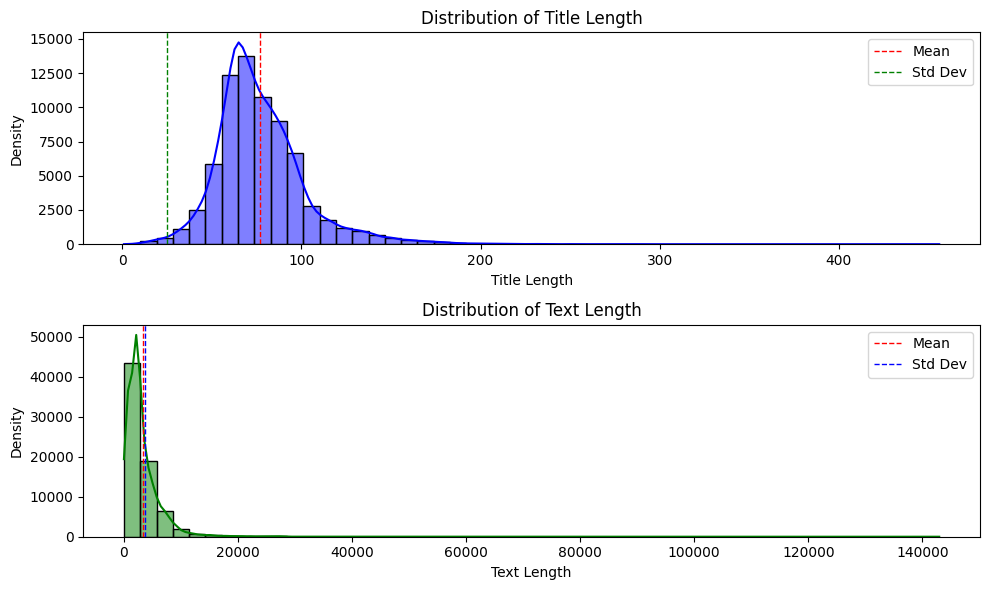

In [22]:
# Calculate the length of each title and text
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()

# Plot histograms
plt.figure(figsize=(10, 6))

# Distribution plot for Title Length
plt.subplot(2, 1, 1)
sns.histplot(df['title_length'], bins=50, kde=True, color='blue')
plt.axvline(df['title_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['title_length'].std(), color='green', linestyle='dashed', linewidth=1, label='Std Dev')
plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Density')
plt.legend()

# Distribution plot for Text Length
plt.subplot(2, 1, 2)
sns.histplot(df['text_length'], bins=50, kde=True, color='green')
plt.axvline(df['text_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['text_length'].std(), color='blue', linestyle='dashed', linewidth=1, label='Std Dev')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


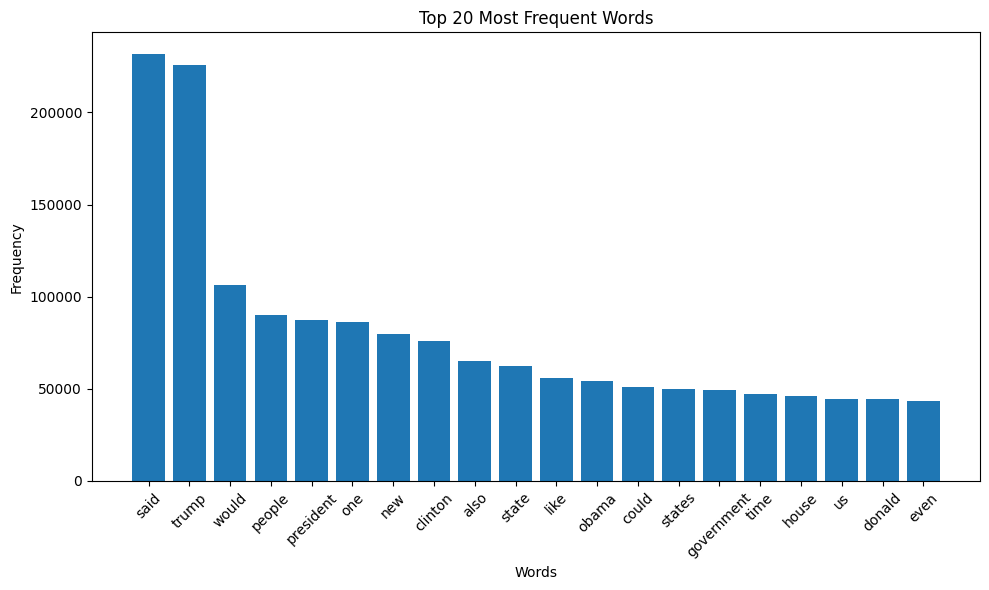

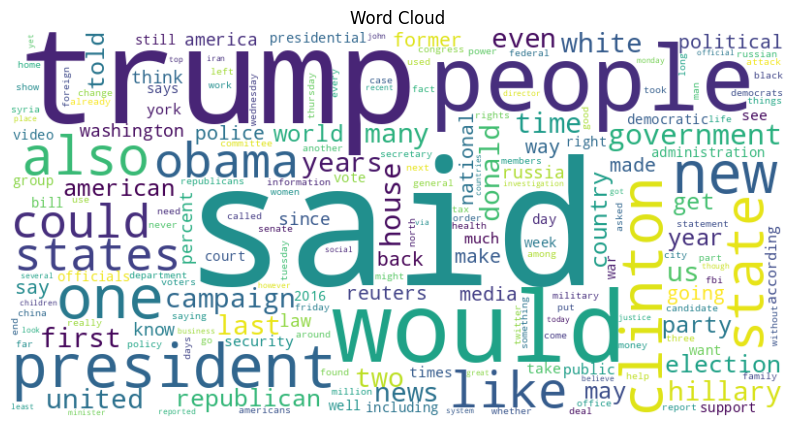

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora, models
import gensim


nltk.download('punkt')
nltk.download('stopwords')


'''Combine the title and text columns for analysis,
   tokenize the text, remove punctuation
   and convert to lowercase Remove stopwords'''

combined_text = ' '.join(df['title'].fillna('') + ' ' + df['text'].fillna(''))
tokens = word_tokenize(combined_text)
tokens = [word.lower() for word in tokens if word.isalnum()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]


'''Calculate word frequencies and
   plot the top N most frequent words'''

word_freq = Counter(tokens)
top_n = 20
common_words = word_freq.most_common(top_n)
words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words')
plt.tight_layout()
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.009*"million" + 0.009*"percent" + 0.007*"new" + 0.007*"said" + 0.006*"year" + 0.006*"money" + 0.006*"company" + 0.006*"would" + 0.005*"tax" + 0.005*"companies"

Topic 2: 0.012*"us" + 0.009*"people" + 0.008*"world" + 0.007*"one" + 0.006*"even" + 0.005*"american" + 0.005*"like" + 0.005*"many" + 0.005*"would" + 0.005*"war"

Topic 3: 0.027*"said" + 0.014*"minister" + 0.013*"party" + 0.013*"government" + 0.011*"eu" + 0.010*"european" + 0.010*"britain" + 0.010*"would" + 0.009*"reuters" + 0.008*"prime"

Topic 4: 0.029*"police" + 0.015*"said" + 0.011*"gun" + 0.009*"people" + 0.007*"shooting" + 0.007*"officers" + 0.007*"violence" + 0.006*"man" + 0.005*"black" + 0.005*"one"

Topic 5: 0.014*"said" + 0.009*"water" + 0.008*"border" + 0.008*"mexico" + 0.008*"city" + 0.007*"climate" + 0.006*"people" + 0.005*"illegal" + 0.005*"immigrants" + 0.005*"energy"

Topic 6: 0.060*"trump" + 0.024*"said" + 0.016*"campaign" + 0.015*"republican" + 0.012*"president" + 0.010*"clinton" + 0.009*"presidentia

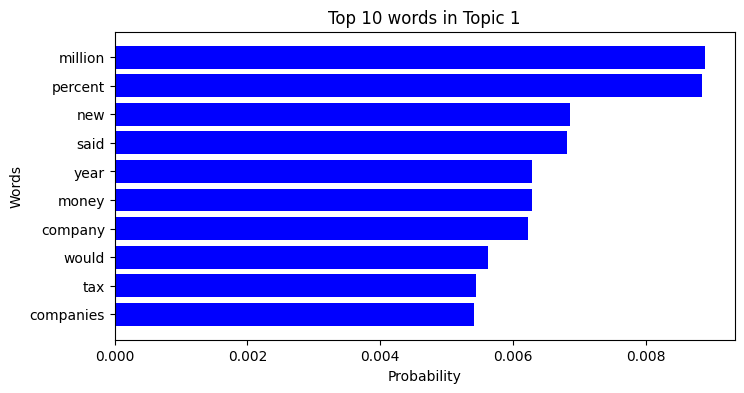

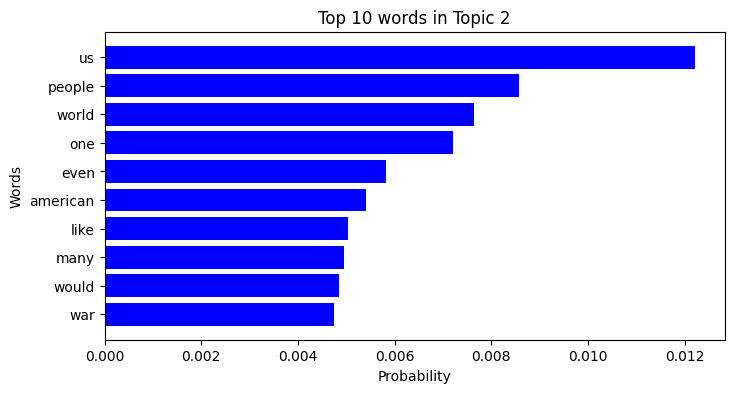

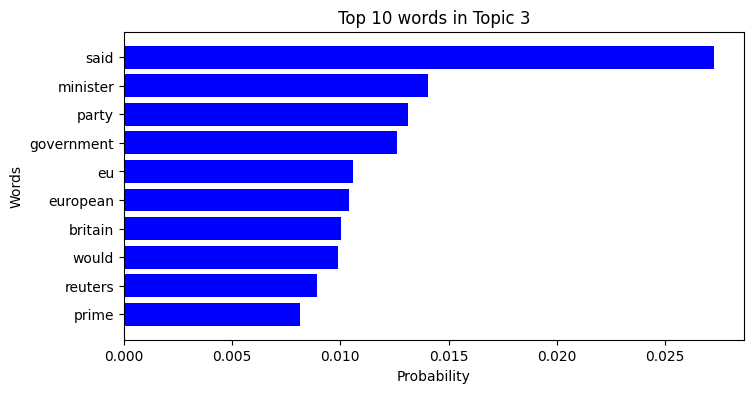

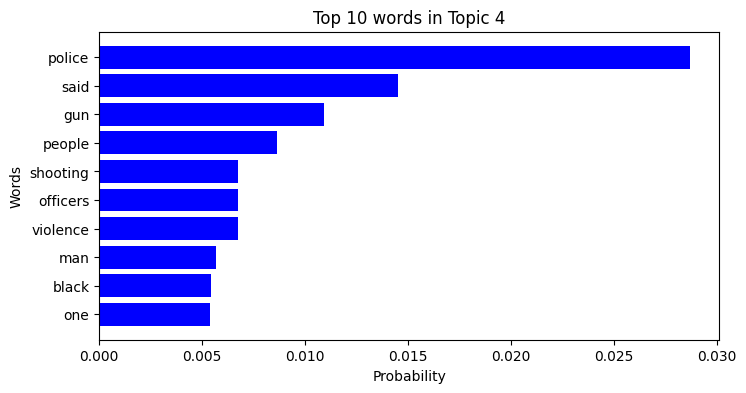

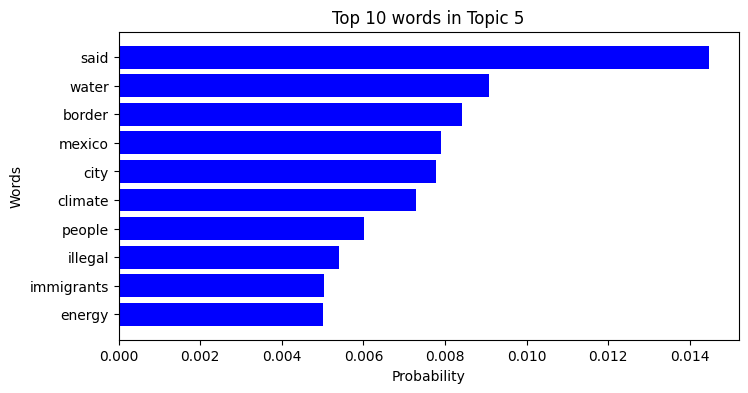

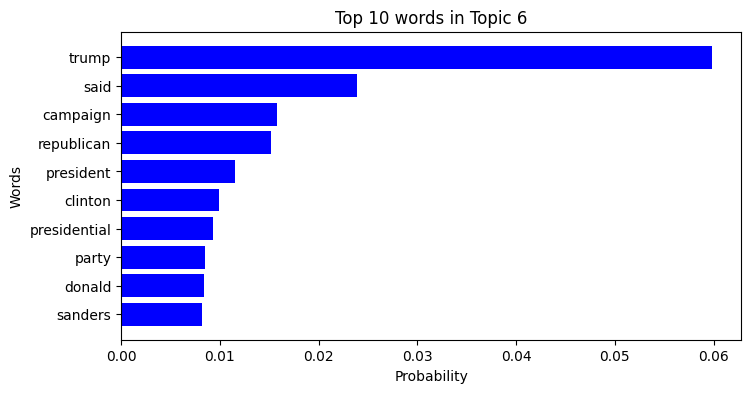

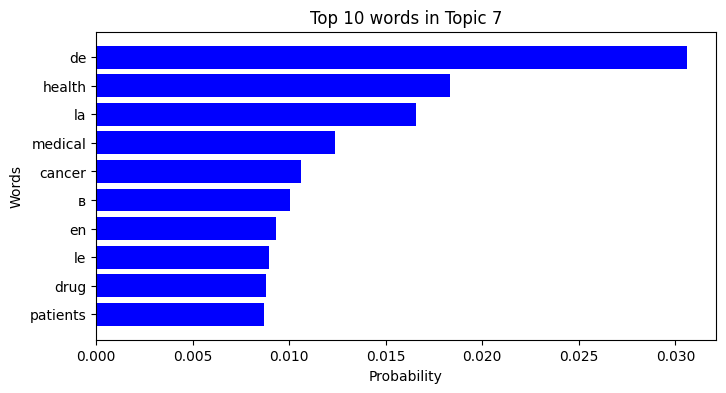

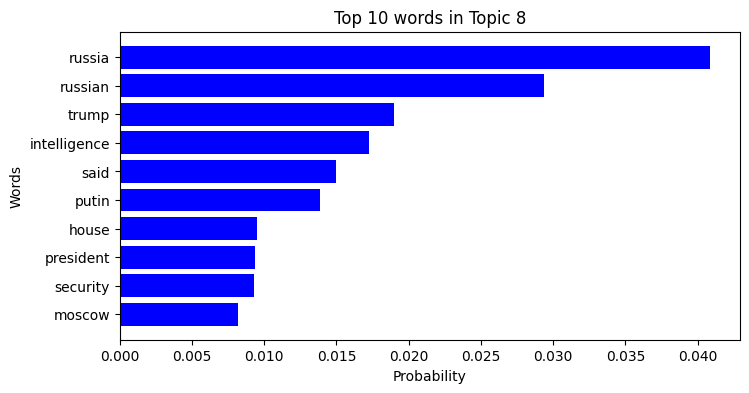

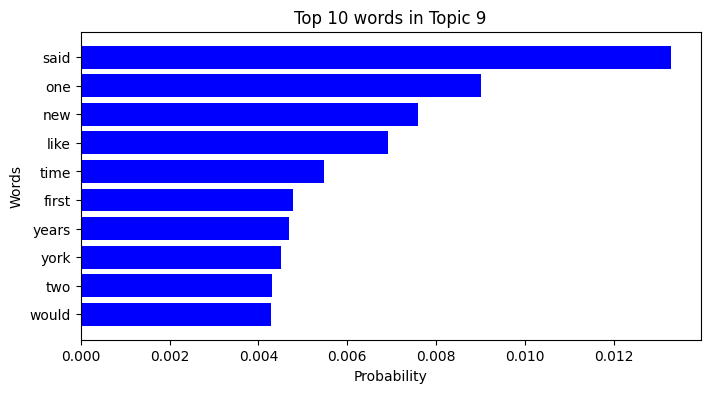

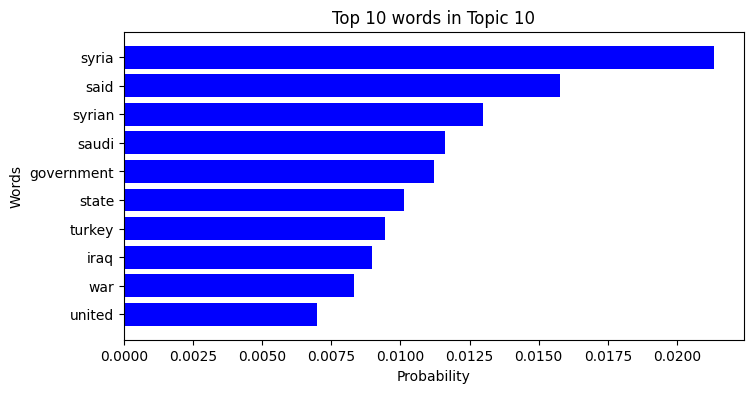

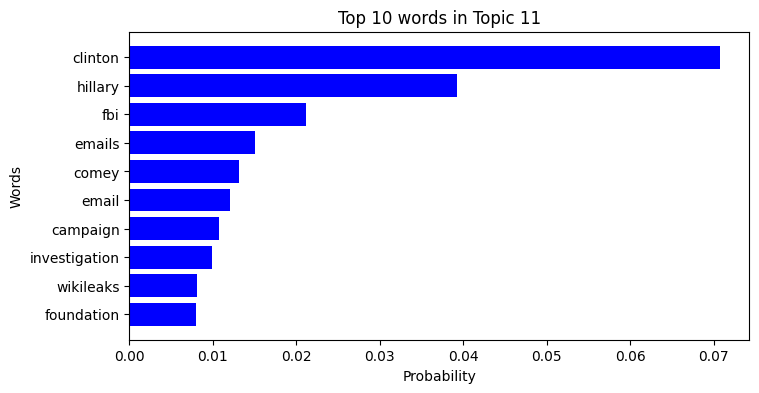

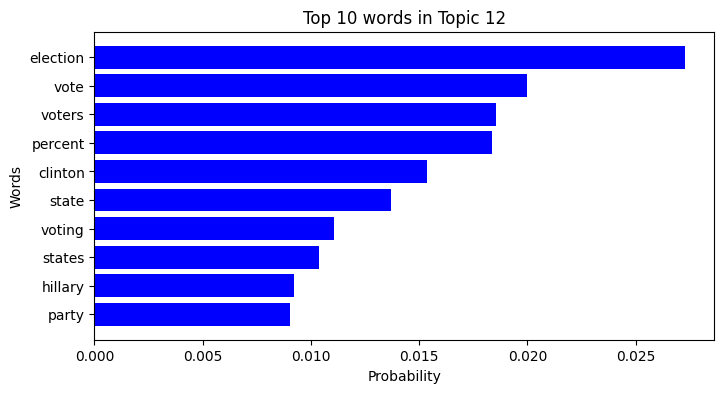

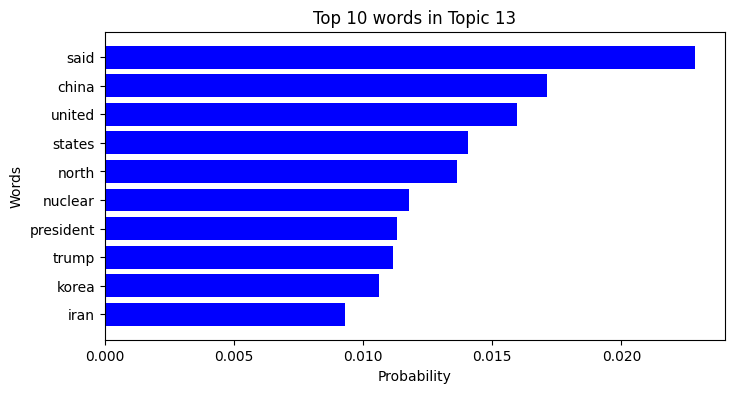

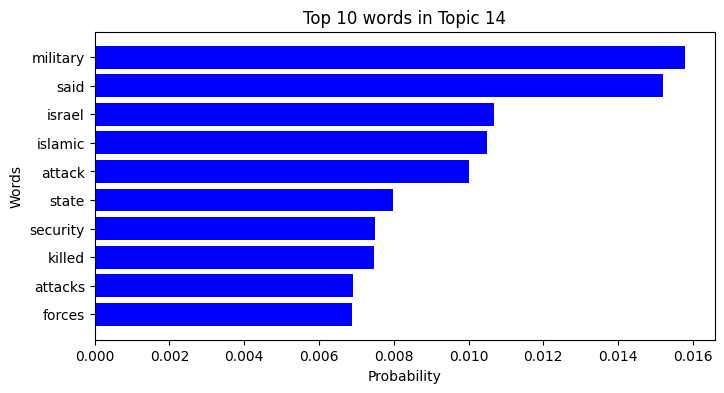

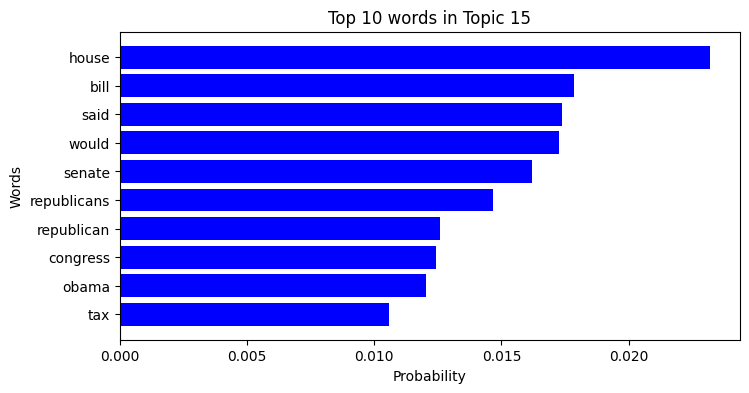

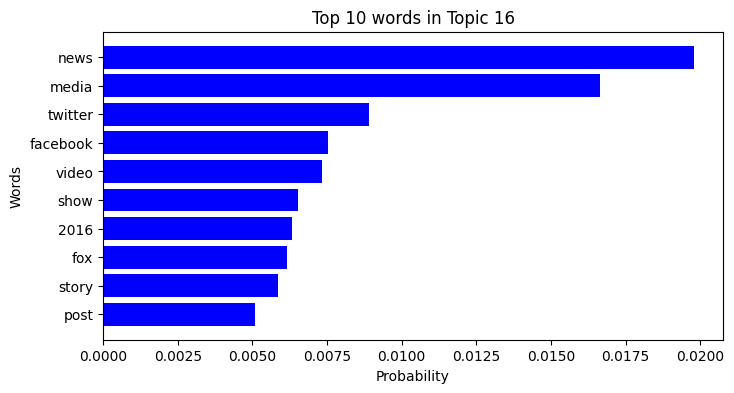

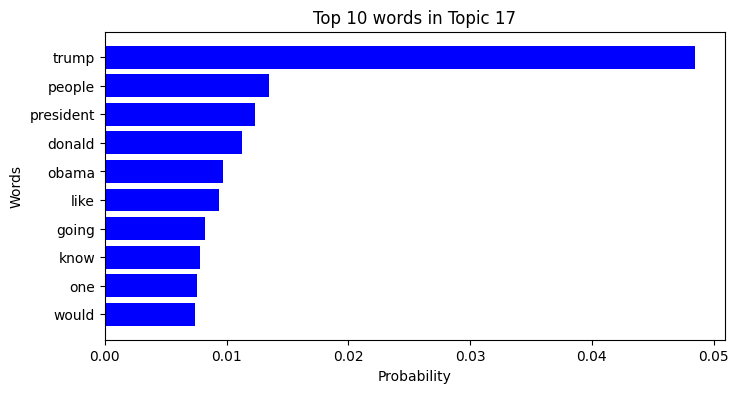

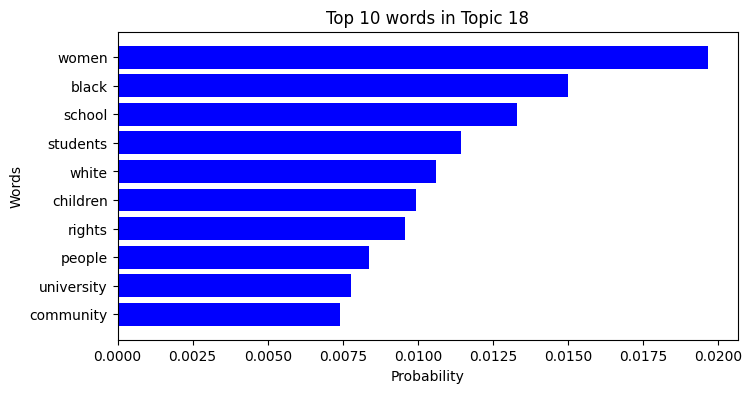

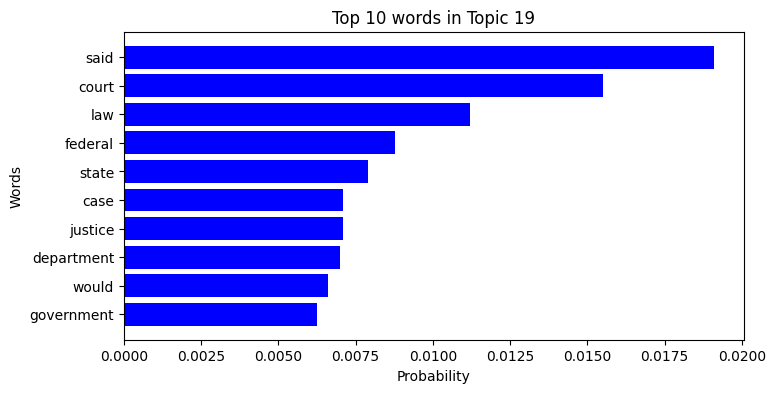

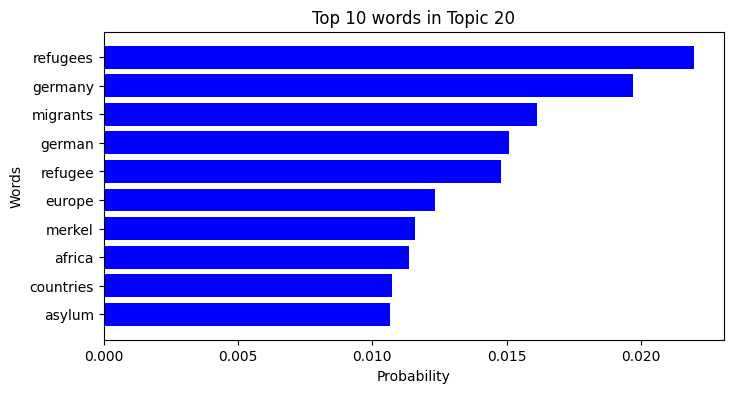

In [28]:
tokens = [word_tokenize(text.lower()) for text in combined_text]
stop_words = set(stopwords.words('english'))
tokens = [[word for word in tokenized_text if word.isalnum() and word not in stop_words] for tokenized_text in tokens]


dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(tokenized_text) for tokenized_text in tokens]

# Perform topic modeling
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15)


for index, topic in lda_model.print_topics(20):
    print(f"Topic {index + 1}: {topic}")
    print()


topics = lda_model.show_topics(num_topics=20, num_words=10, formatted=False)
for topic_id, topic in topics:
    words = [word for word, _ in topic]
    plt.figure(figsize=(8, 4))
    plt.barh(range(10), [prob for _, prob in topic], color='blue')
    plt.xlabel('Probability')
    plt.ylabel('Words')
    plt.title(f'Top 10 words in Topic {topic_id + 1}')
    plt.yticks(range(10), words)
    plt.gca().invert_yaxis()
    plt.show()

# Code

We have adapted the code from __Homework 1: BERT Finetuning for Robust Phrasal Chunking__ to align with our project's goals. In place of encapsulating an additional `TransformModel` class, we have chosen to employ the `DistilBertForSequenceClassification` model provided by the HuggingFace library for our binary classification task. This modification enables us to harness the power of DistilBERT while tailoring its functionality to suit the specific needs of our project.

# Experimental Setup

In the assessment of binary classification tasks, standard evaluation metrics encompass __accuracy__, __precision__, 
__recall__, and __the F-1 score__. To facilitate this evaluation, we establish a confusion matrix as follows:



|            |    | Actual|Behavior  |
| -----------|----|-------|----------|
|            |    | 1     | 0        |
| Prediction | 1  | TP    | FP       |
| Behavior   | 0  | FN    | TN       |

Within the context of this confusion matrix:


* __TP (True Positives)__: The count of instances that are actually positive and are correctly predicted as positive by the model.

* __FP (False Positives)__: The count of instances that are actually negative but are incorrectly predicted as positive by the model.

* __FN (False Negatives)__: The count of instances that are actually positive but are incorrectly predicted as negative by the model.

* __TN (True Negatives)__: The count of instances that are actually negative and are correctly predicted as negative by the model.


So the evaluation metrics are defined as the following:

* __Accuracy__: 
    $$\frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}$$
    
* __Precison__:

    $$  \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$
* __Recall__:

    $$    \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$
    
* __F-1 Score__:
    $$ 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


Our rationale for embracing a variety of evaluation metrics in our binary classification model stems from their specialized focus on distinct dimensions of classification performance, each suited to particular scenarios. However, it's crucial to acknowledge that these metrics are not universally infallible. For instance, while accuracy is widely understood, it can mislead in cases of imbalanced classes, undermining its reliability. This underscores the importance of precision and recall, catering to nuanced challenges of false positives and false negatives, especially in imbalanced contexts. The F-1 score strikes a balance, yet even it has limitations based on varying error costs. By integrating a comprehensive range of metrics and understanding their constraints, we gain a holistic view of our model's performance, enabling us to navigate complexities like class imbalance and critical errors, ensuring our evaluations align closely with the task's intricacies and leading to informed model development.

# Results

Our model underwent a rigorous evaluation employing these metrics, yielding the following results:
| Metric       | Fine-tuned Model | Pre-trained Model |
|--------------|------------------|------------------|
| Accuracy     | 0.951632         | 0.502272         |
| Precision    | 0.951078         | 0.497532         |
| Recall       | 0.951954         | 0.498211         |
| F-1 Score    | 0.951078         | 0.534324         |

![Graph Example](confusion_matrix.png)

# Analysis of the Results

The confusion matrix effectively demonstrates a scarcity of False Positives and False Negatives. Furthermore, our carefully fine-tuned BERT model has achieved exceptionally high scores across a range of evaluation metrics, particularly when compared to the lackluster performance of the pre-trained base model, which resembles random guessing. This experiment distinctly emphasizes the power of fine-tuning in the domain of fake news detection, highlighting its capability to significantly enhance accuracy and effectiveness.

# Future Work

As we conclude this phase of our project focused on fake news detection utilizing large language models, it's important to reflect on potential avenues for future development and enhancement. While our current approach involving fine-tuning the BERT model has yielded promising results in terms of accuracy on the test set, there are several aspects that warrant further attention to elevate the efficacy of our solution.

\\

One key consideration for future work is the exploration of more sophisticated pre-processing techniques. While our current approach effectively handles common text cleaning tasks, delving into more advanced strategies for handling noise, handling text anomalies, and addressing linguistic nuances could potentially lead to improved model performance. Moreover, incorporating domain-specific features or utilizing additional contextual information from external sources might contribute to the model's ability to discern between real and fake news more effectively.

\\

Furthermore, given the dynamic nature of language and the evolving landscape of misinformation, continuous model retraining and adaptation is essential. Implementing a robust mechanism for updating our fine-tuned BERT model with new data and potentially incorporating transfer learning from even larger datasets could ensure that our model remains relevant and accurate over time.

\\

Another avenue to explore is the incorporation of ensemble techniques. Combining predictions from multiple models or even diverse model architectures can often lead to more robust results, as it mitigates the potential shortcomings of individual models.

\\

Additionally, extending our evaluation metrics beyond accuracy could provide a more comprehensive understanding of model performance. Metrics such as precision, recall, F1-score, and even considering the model's performance across different news categories could offer a more nuanced view of its strengths and weaknesses.

\\

In conclusion, while our current approach marks a significant step toward fake news detection, future work will involve delving deeper into preprocessing strategies, considering domain-specific information, embracing continual learning, exploring ensemble techniques, and adopting a more comprehensive evaluation strategy. By addressing these areas, we believe our project can make an even more impactful contribution to the crucial task of combating fake news in the digital age.